In [1]:
import sys
import os
from dotenv import load_dotenv


import sqlalchemy as sq
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append("../")
from Shared.DataService import DataService

In [2]:
load_dotenv()
PG_DB = os.getenv("POSTGRES_DB")
PG_ADDR = os.getenv("POSTGRES_ADDR")
PG_PORT = os.getenv("POSTGRES_PORT")
PG_USER = os.getenv("POSTGRES_USER")
PG_PW = os.getenv("POSTGRES_PW")

In [3]:
# connecting to database
db = DataService(PG_DB, PG_ADDR, PG_PORT, PG_USER, PG_PW)
conn = db.connect()

In [4]:
query = sq.text("select * FROM public.ergot_sample")
ergot_df = pd.read_sql(query, conn)

In [5]:
ergot_df

,sample_id,year,province,crop_district,incidence,severity
0,1,1995,AB,1,False,0.0
1,2,1995,AB,1,False,0.0
2,3,1995,AB,1,False,0.0
3,4,1995,AB,1,False,0.0
4,5,1995,AB,1,False,0.0
...,...,...,...,...,...,...
158684,158685,2022,SK,81,False,0.0
158685,158686,2022,SK,81,False,0.0
158686,158687,2022,SK,81,False,0.0
158687,158688,2022,AB,7,False,0.0


In [6]:
# car : canadian agriculture region
ergot_df.loc[ergot_df["province"] == "MB", "car_uid"] = ergot_df.loc[ergot_df["province"] == "MB", "crop_district"] + 4600
ergot_df.loc[ergot_df["province"] == "SK", "car_uid"] = (ergot_df.loc[ergot_df["province"] == "SK", "crop_district"] - 1) + 4700
ergot_df.loc[ergot_df["province"] == "AB", "car_uid"] = (ergot_df.loc[ergot_df["province"] == "AB", "crop_district"] * 10) + 4800

In [7]:
ergot_df.drop(columns=['crop_district', 'sample_id'], inplace=True)

In [8]:
ergot_df['car_uid'] = pd.to_numeric(ergot_df['car_uid'], downcast='integer')
ergot_df

,year,province,incidence,severity,car_uid
0,1995,AB,False,0.0,4810
1,1995,AB,False,0.0,4810
2,1995,AB,False,0.0,4810
3,1995,AB,False,0.0,4810
4,1995,AB,False,0.0,4810
...,...,...,...,...,...
158684,2022,SK,False,0.0,4780
158685,2022,SK,False,0.0,4780
158686,2022,SK,False,0.0,4780
158687,2022,AB,False,0.0,4870


In [17]:
df = ergot_df[].unique()




array(['AB', 'MB', 'SK'], dtype=object)

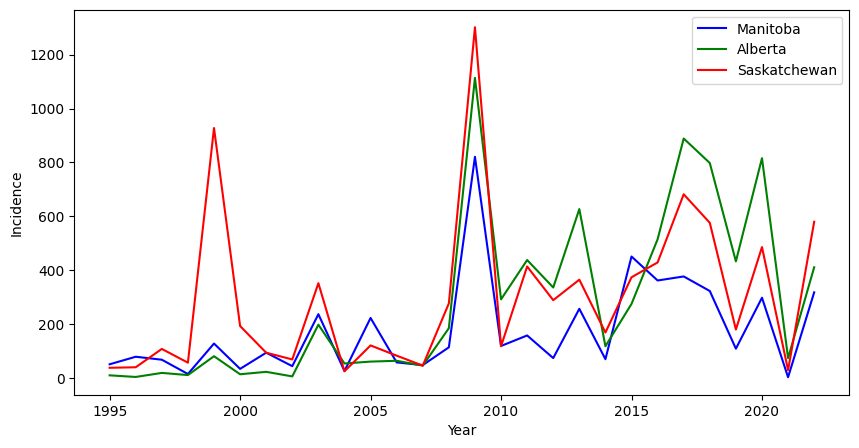

In [68]:
# sample with incidence = True: per year, per province
samples_df = ergot_df[ergot_df['incidence'] == True].groupby(['province', 'year'])['incidence'].count().reset_index()
mb_df = samples_df[samples_df['province'] == 'MB']
ab_df = samples_df[samples_df['province'] == 'AB']
sk_df = samples_df[samples_df['province'] == 'SK']

year = mb_df['year'].tolist()
mb_incidence = mb_df['incidence'].tolist()
ab_incidence = ab_df['incidence'].tolist()
sk_incidence = sk_df['incidence'].tolist()


plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.plot(year, mb_incidence, color="blue")
plt.plot(year, ab_incidence, color="green")
plt.plot(year, sk_incidence, color="red")
plt.legend(['Manitoba', 'Alberta', 'Saskatchewan'])
plt.show()
